# Ejemplo Columna auxiliar para buscar serie de datos contiguos sin huecos sintéticos o reales 

# Librerias 
Se importan las librerías que se usan a lo largo del README

In [1]:
#Se importa la libreria pandas para observar el archivo de tiempo
#Libreria para manipular variables de tiempo
#Importación de la libreria desarrollada
#Libreria que permite crear series de datos con caos
import pandas as pd    
import matplotlib.pyplot as plt       
import datetime
import cmpy2 
from lorenz import *

Datos agregados
Datos agregados
Datos agregados
Datos importados
Datos agregados
[1.0, 2.0, 3.0, nan, nan, 4.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0]
[1.0, 2.0, 3.0, nan, nan, 4.0, nan, 5.0, 6.0, 7.0, 8.0, 9.0]


## EJEMPLO 1:
### POCOS DATOS. 

La libreria tiene como entradas dos listas, la primera es una lista de tamñano n de números reales y la segunda es una lista de tamaño n de fechas 

In [17]:
#Lista de datos con valores nulos
data = [1,2,3,np.nan,np.nan,4,5,np.nan,6,7,8,9]
#Liista de fechas
date = ['01/01/1986 01:00:00', '01/01/1986 02:00:00', '01/01/1986 03:00:00', '01/01/1986 04:00:00', '01/01/1986 05:00:00', '01/01/1986 06:00:00', '01/01/1986 07:00:00', '01/01/1986 08:00:00', '01/01/1986 09:00:00', '01/01/1986 10:00:00', '01/01/1986 11:00:00', '01/01/1986 12:00:00']

Usanda la libreria  **cmpy** ingresamos los datos y las fechas en el objeto Reconstruir y con ello creamos una estrucutra que busca facilitar la implentación de métodos de reconstrucción y visualización de datos.

In [18]:
#Vector de clasificación v = [0.6,0.2,0.2], la suma debe ser uno.
clasificacion = [0.6,0.2,0.2]
#Creación del objeto se alimenta con el vector de datos, el vector de fechas y el vector de clasificación (opcional)
prueba = cmpy2.Reconstruir(data,date,"Prueba",clasificacion)

Datos agregados
Datos agregados
Datos agregados
Datos importados


Se ha creado una matriz que organiza los datos en tres columnas:
* date: Columna de fechas en formato de tiempo.
* data: Columna de datos.
* S: Clasificación de los datos en (E)ntrenamiento, (P)rueba y (V)erificación.

In [19]:
prueba.df

,date,x_i,S
0,1986-01-01 01:00:00,1.0,E
1,1986-01-01 02:00:00,2.0,E
2,1986-01-01 03:00:00,3.0,E
3,1986-01-01 04:00:00,NaN,E
4,1986-01-01 05:00:00,NaN,E
5,1986-01-01 06:00:00,4.0,E
6,1986-01-01 07:00:00,5.0,E
7,1986-01-01 08:00:00,NaN,E
8,1986-01-01 09:00:00,6.0,P
9,1986-01-01 10:00:00,7.0,P


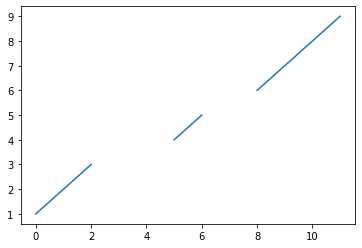

In [20]:
plt.plot(prueba.df["x_i"])

Podemos observar de forma estadistica los datos numéricos usando el método **describe**, el cual mostrará la relación de datos y el histograma relacionado. Se puede agregar contenido en función de las necesidades.

12 elementos en Prueba. 
 9 datos y 3 huecos


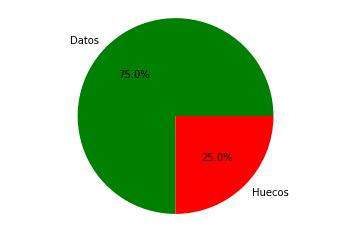

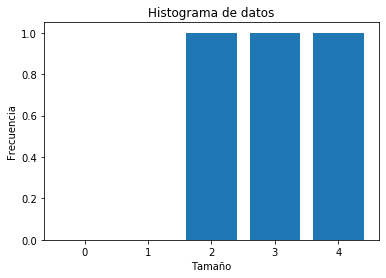

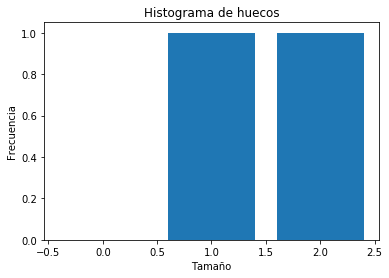

In [21]:
prueba.describe()

Podemos obtener los datos del historgrama creado al usar el método **hist** el cual regresa la posición y el peso, en ese orden

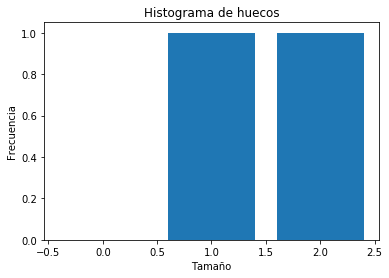

Posición:  [0, 1, 2]
Peso: [0, 1, 1]


In [22]:
n, bins = prueba.hist('x_i','h')
print("Posición: ",n)
print("Peso:", bins)

El objeto permite crear huecos siguiendo un arreglo aleatorio de una secuencia de huecos o pesos (para esta aplicación)

In [23]:
#Secuencia aleatoria de números
denH = [1,3,5,7,42,1]
denD = [4,2,1,4,1,2]
#Nueva columna
nuevaCol = prueba.generadorHuecos(denH,denD)

Datos agregados


El método **generadorHuecos** crea en la matriz principal una nueva columna y tiene a la salida el arreglo agregado. La columna creada toma la siguiente nomenclatura **HGV#**, con # variando en función de la posición de la columna que tome

In [28]:
print("Nueva columna",nuevaCol)
prueba.df

Nueva columna [ 1.  1.  1.  1. nan  1.  1. nan nan nan  1. nan]


,date,x_i,S,HGV3
0,1986-01-01 01:00:00,1.0,E,1.0
1,1986-01-01 02:00:00,2.0,E,1.0
2,1986-01-01 03:00:00,3.0,E,1.0
3,1986-01-01 04:00:00,NaN,E,1.0
4,1986-01-01 05:00:00,NaN,E,NaN
5,1986-01-01 06:00:00,4.0,E,1.0
6,1986-01-01 07:00:00,5.0,E,1.0
7,1986-01-01 08:00:00,NaN,E,NaN
8,1986-01-01 09:00:00,6.0,P,NaN
9,1986-01-01 10:00:00,7.0,P,NaN


## Ejemplo: Union de Dos Conjuntos de Series de Tiempo de Huecos 

Para considerar una secuencia válida durante la busqueda de vecinos, esta no debe tener NaN (datos faltantes) en posiciones utilizadas por la máscara $M$ en la columna de la serie de tiempo original y en la columna de Huecos Artificiales.

Para esto se genera un nuevo vector que incluya los huecos de las dos series. 

Dado a que las localidades del vector de huecos contiene $NaN$'s para indicar un hueco artificial y $1$ para indicar un dato, es posible calcular la unión de huecos de las dos series con una multiplicación de vectores.

A continuación un ejemplo:

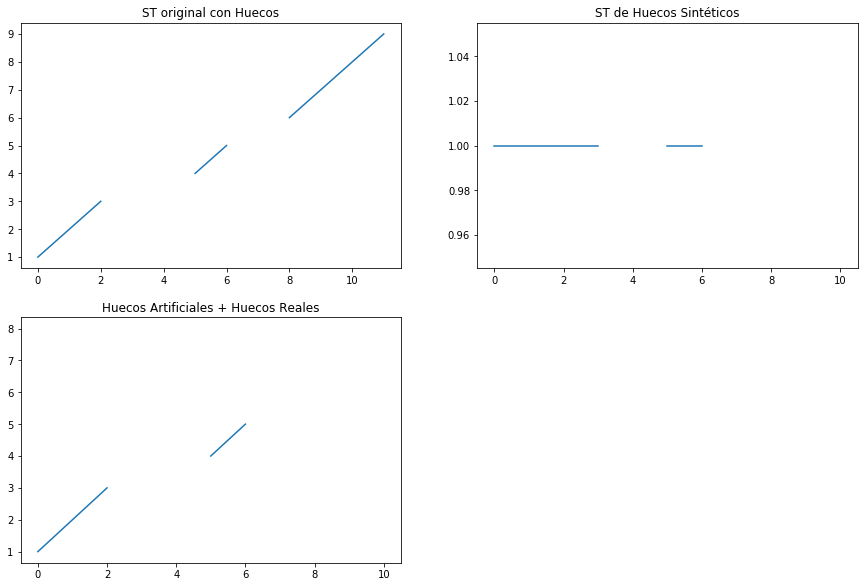

In [51]:

plt.figure(figsize = (15,15))

plt.subplot(221)
plt.title("ST original con Huecos")
plt.plot(prueba.df["x_i"])

plt.subplot(222)
plt.title("ST de Huecos Sintéticos")
plt.plot(prueba.df["HGV3"])

plt.subplot(223)
plt.title("Huecos Artificiales + Huecos Reales")
unionH = prueba.df["x_i"]*prueba.df["HGV3"]
plt.plot(unionH)

plt.subplots_adjust(bottom=0.25, top=0.75)
plt.show()
